<h1 align='center' style='color:purple'> Coding Club - Deep Learning for Automatic Segmentation in Python - 07 June 2021 </h1>

- Prepare and download Datasets - Data Science Bowl 2018 
    - https://www.kaggle.com/c/data-science-bowl-2018
        - stage1_train 80,980 KB     

- UNet - Paper links
    - https://arxiv.org/abs/1505.04597   
    - https://arxiv.org/pdf/1505.04597.pdf

In [ ]:
'''
- UNET
    - Olaf Ronneberger et a et al
        - Biomedical Image Segmentation
- UNET Architecture
        - Includes Two Paths
    
        - Frist Path
            - Contraction Path - also called Encoder
                - Extract image features and capture image context
                - it is stacked with convolutional layers and max pooling layers
        - Second Path
            - Expansion Path - also called Decoder
                - it uses transpose convolutional layers to accurately localize ROI regions,
                  and output segmentation results
                  
            - Therefore, UNet is an End-To-End model
                - Fully Convolutional Network - FCN
                    - use Convolutional Layers
                    - no any Dense Layers
                - And it can accept images of any size
'''

<img src="https://img2018.cnblogs.com/blog/1503464/201907/1503464-20190702214924773-1537768185.png" width="75%">

- UNet Paper 
    - Original Paper
        - Input Image of size - 572x572x3
    - Here, in our task
        - Input Image of size - 128x128x3


<img src="https://miro.medium.com/max/1562/1*yzbjioOqZDYbO6yHMVpXVQ.jpeg" width="75%">

In [ ]:
- UNet
    - CNN - a model to learn image feature mapping
        - use it to extract various image features
        - it achieves best performance in image Classification Problem
            - Because the image is transformed into a vector that can 
              be further used for classification

    - For Image Segmentation
        - we not only need to transform Image To Vector 
        - but also need to Reconstruct it from Vector to Image 
        - This is a challenging task
            - because transforming Vector to Image is much harder
              than transforming Image To Vector
        
    - during the process of transforming Image to Vector, 
        - it also means a process of Feature Mapping
    
- Solution of UNet
    - use Contraction path to extract image features with smaller Feature Maps
    - Then expansion path extends these smaller Feature Maps (Vectors) to Segmented Images

    - Preserve Structural Integrity of images
    - Reduce image Distortion and Information Loss
    

In [ ]:
- UNet Architecture
    - it looks like 'U' shape
        - Includes Three Parts：
                       - Contraction Section
                       - Bottleneck  Section
                       - Expansion   Section

<img src="https://img2018.cnblogs.com/blog/1503464/201907/1503464-20190702214924773-1537768185.png" width="75%">

- we can write some Keras codes to define the above UNet architecture

In [ ]:
- Contraction Section
    - some Contraction blocks
    - each block uses
        - two convolutional layers with 3X3 kernels
    - then add a max pooling layer with 2X2 size
    - Double the number of kernels/feature maps after each block
        - it can Learn The Complex Structures and more features of input images

- Bottleneck  Section 
        
    - The lowest layer is mediated between Contraction Layer & Expansion Layer
        - use 
            - two convolutional layers with 3X3 kernels
            - one Transpose Convolution Layer with 3X3 kernels, (2, 2) strides

In [ ]:
- Expansion Section 
    - Consisting of several Expansion Blocks
    
    - each block has
        - two 3X3 convolutional layers
        - one Transpose Convolution Layer with 3X3 kernels, (2, 2) strides
    - Similarly, after each block
        - The number of feature maps used by the convolution layer is halved to maintain symmetry
    
    - But, we also concatenate feature maps from the contraction path, which can help to
        - ensure these feature maps be used to Reconstruct the segmented result
        - So, the number of expansion blocks is the same as the number of contraction blocks
            - at last，mapped result will pass to the final 1X1 convolutional layer
                - its Feature Maps Equal To The Number Of Segments Desired
    

<img src="https://pics.spark-in.me/upload/cb8197bb7e57317eda88f921dfc1c413.png" width="50%">

<img src="https://paperswithcode.com/media/methods/Screen_Shot_2020-07-07_at_9.08.00_PM_rpNArED.png" width="75%">

<img src="https://miro.medium.com/max/4499/1*eKrh8FqJL3jodebYlielNg.png" width="100%">

- Resnet34 Network structure diagram

<img src="https://img-blog.csdnimg.cn/20190921161814574.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L20wXzM3NDc3MTc1,size_16,color_FFFFFF,t_70" width="100%">

- Residual Block 

<img src="https://img-blog.csdnimg.cn/20181202195444128.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L20wXzM3NDc3MTc1,size_16,color_FFFFFF,t_70#pic_center" width="50%">

- Res-Unet structure diagram

<img src="https://miro.medium.com/max/4499/1*eKrh8FqJL3jodebYlielNg.png" width="100%">

- UNet - Loss Calculation
    - Energy Function
        - e.g., we can use Cross-Entropy Loss Function 

    - The energy function is computed 
        - by a pixel-wise softmax over the final feature map and 
          the corresponding ground truth image
        - combined with the cross-entropy loss function
         
- Indeed, we need to assign a class for each image pixel, which can be regarded as a pixel-level classification problem.
        

- Some Appliactions

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-019-41034-2/MediaObjects/41598_2019_41034_Fig1_HTML.png?as=webp" width="˙25%">

<img src="https://i.imgur.com/ZXj1nzK.png" width="75%">

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-019-53797-9/MediaObjects/41598_2019_53797_Fig1_HTML.png?as=webp" width="75%">

<img src="https://img-blog.csdn.net/20180519115329536?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0Zvcm1sc2w=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70" width="100%">

<img src="https://www.researchgate.net/profile/Alan_Jackson9/publication/323597886/figure/fig2/AS:601386504957959@1520393124691/Convolutional-neural-network-CNN-architecture-based-on-UNET-Ronneberger-et-al.png" width="75%">

<img src="https://miro.medium.com/max/1536/0*XopkzM3HLI4UEKSZ.png" width="75%">

<img src="https://envirocons5home.files.wordpress.com/2019/06/figure1-1.jpg?w=476&h=310" width="75%">

<img src="https://pic4.zhimg.com/v2-8df8cad1df47e4a4be76537815663352_1200x500.jpg" width="50%">

- U-Net: Image Segmentation

<img src="https://neurohive.io/wp-content/uploads/2018/11/u-net-segmentation-e1542978983391.png" width="50%">

<img src="https://neurohive.io/wp-content/uploads/2018/11/u-net-x.png" width="75%">

<img src="https://neurohive.io/wp-content/uploads/2018/11/expert-vs-unet.jpeg" width="50%">

# UNet Codes

In [ ]:
File Path/


    ├── Coding_Club - Deep Learning for Automatic Segmentation in Python - 07 June 2021.ipynb 
    ├── dataset
    |      ├── xxx1.Folder
    |      |     ├── images
    |      |     |      └── xxx1.png
    |      |     └── masks
    |      |            ├── xxx1.111.png
    |      |            └── xxx1.222.png
    |      ├── xxx2.Folder
    |      |     ├── images
    |      |     |      └── xxx2.png
    |      |     └── masks
    |      |            ├── xxx2.111.png
    |                   └── xxx2.222.png 
    |
    ├── stage1_train.zip 
    ├── unetmodel.png
    └── unetweights.h5

- Prepare&Download Datasets - Data Science Bowl 2018 
    - https://www.kaggle.com/c/data-science-bowl-2018
        - stage1_train 80,980 KB   

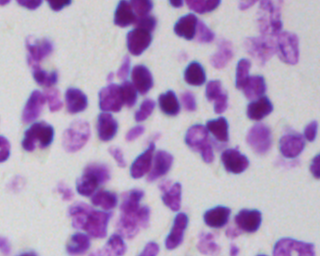

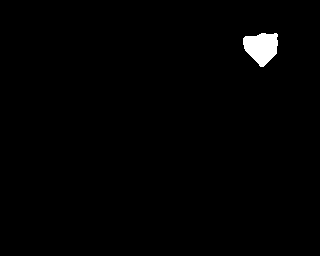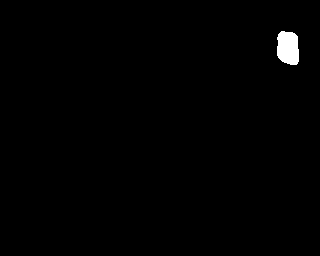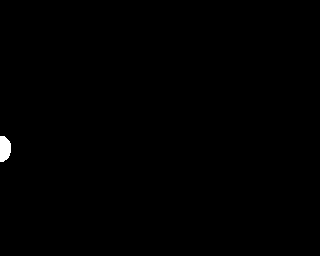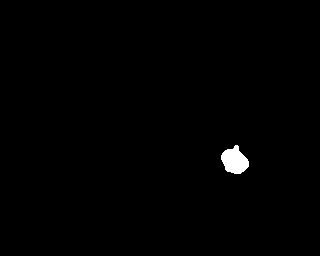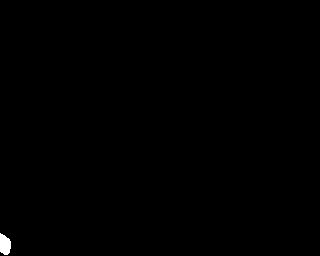

- Ignore Warning  Message 

In [40]:
import warnings
warnings.filterwarnings("ignore")

- Check if there is GPU

In [41]:
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4981312873069832106
]


If you have GPU, the output would be like below:

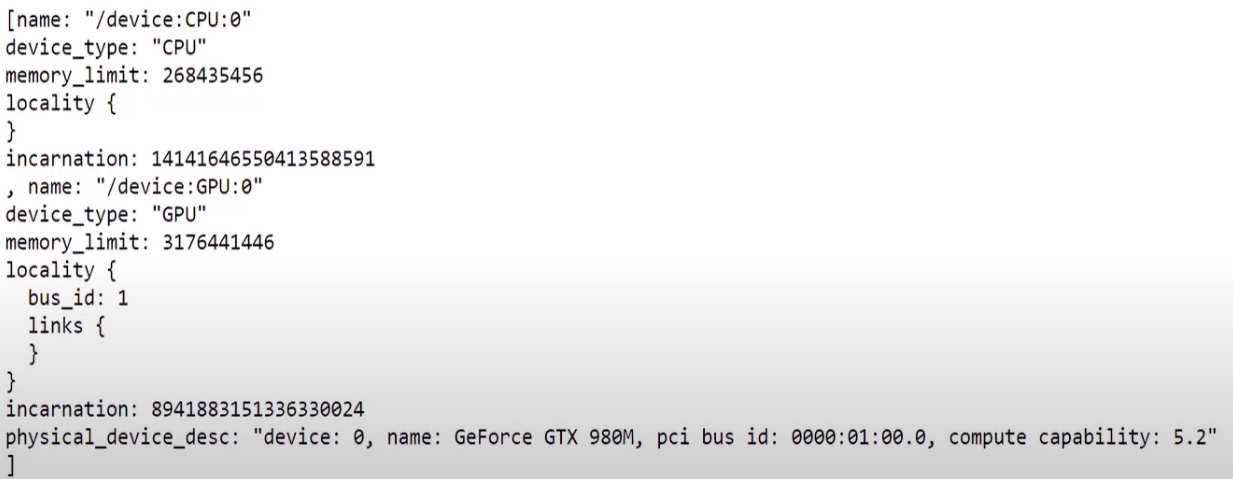

if we have GPU, then we can

  - Use os.environ to set environment variables
  - e.g., tell Tensorflow your CUDA and GPU ID

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [42]:
!python -V

Python 3.7.10


In [43]:
import keras 
print(keras.__version__)

2.5.0


- Install/ Import - required libraries

- python - how to use os.path, you can check:
    - https://docs.python.org/3/library/os.path.html

In [44]:
import os

print(os.path.abspath("."))    #The absolute path to the current directory
print(os.path.abspath(r".."))  #The absolute path to the previous directory

/content
/


In [45]:
## Imports
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding 
seed = 2021
random.seed = seed
np.random.seed = seed
tf.seed = seed

- Data Generator

In [ ]:
class DataGen(keras.utils.Sequence):
    def __init__(self, ids, path, batch_size=8, image_size=128):
        self.ids = ids
        self.path = path
        self.batch_size = batch_size
        self.image_size = image_size
        self.on_epoch_end()
        
    def __load__(self, id_name):
        ## File Path
        image_path = os.path.join(self.path, id_name, "images", id_name) + ".png"
        mask_path = os.path.join(self.path, id_name, "masks/")
        all_masks = os.listdir(mask_path)
        
        ## Reading Image
        image = cv2.imread(image_path, 1)
        image = cv2.resize(image, (self.image_size, self.image_size))
        
        mask = np.zeros((self.image_size, self.image_size, 1))
        
        ## Reading Masks
        for name in all_masks:
            _mask_path = mask_path + name
            _mask_image = cv2.imread(_mask_path, -1)
            _mask_image = cv2.resize(_mask_image, (self.image_size, self.image_size)) #128x128
            _mask_image = np.expand_dims(_mask_image, axis=-1)
            mask = np.maximum(mask, _mask_image)
            
        ## Normalizing 
        image = image/255.0
        mask = mask/255.0
        
        return image, mask
    
    def __getitem__(self, index):
        if(index+1)*self.batch_size > len(self.ids):
            self.batch_size = len(self.ids) - index*self.batch_size
        
        files_batch = self.ids[index*self.batch_size : (index+1)*self.batch_size]
        
        image = []
        mask  = []
        
        for id_name in files_batch:
            _img, _mask = self.__load__(id_name)
            image.append(_img)
            mask.append(_mask)
            
        image = np.array(image)
        mask  = np.array(mask)
        
        return image, mask
    
    def on_epoch_end(self):
        pass
    
    def __len__(self):
        return int(np.ceil(len(self.ids)/float(self.batch_size)))

How to access Google Drive for reading your data in Google Colab

In [46]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzip your data and save your unzipped data into /dataset/

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Coding_Club/stage1_train.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/Coding_Club/dataset/")

- Hyperparameters

In [ ]:
image_size = 128
train_path = "/content/drive/MyDrive/Coding_Club/dataset/"

# 5 Epochs acc: 0.9417 / Epoch = 10  acc: 0.9493
epochs = 10   
batch_size = 8

# Training Ids
# next + os.walk() #File folder - all directories and file names
train_ids = next(os.walk(train_path))[1]

# Validation Data Size
val_data_size = 10

valid_ids = train_ids[:val_data_size]
train_ids = train_ids[val_data_size:]

- Get one batch image file from DataFolder  - dataset/

In [ ]:
gen = DataGen(train_ids, train_path, batch_size=batch_size, image_size=image_size)
x, y = gen.__getitem__(0)
print(x.shape, y.shape)

(8, 128, 128, 3) (8, 128, 128, 1)


- Check an Image randomly

- plt.subplots_adjust #Adjust the spatial configuration of the image
- fig.subplots_adjust(hspace=0.4, wspace=0.4)

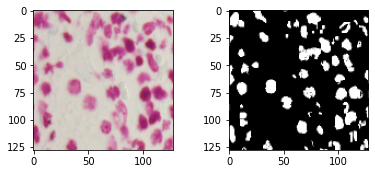

In [47]:
r = random.randint(0, len(x)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y[r], (image_size, image_size)), cmap="gray")

- Different Convolutional Blocks
    - Build up Unet network Function - down_block/bottleneck/up_block

In [48]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

- Build UNet Network Model Actitecture 

In [49]:
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 3))
    
    # downsampling 
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) # 128 -> 64
    c2, p2 = down_block(p1, f[1]) # 64 -> 32
    c3, p3 = down_block(p2, f[2]) # 32 -> 16
    c4, p4 = down_block(p3, f[3]) # 16->8
    
    bn = bottleneck(p4, f[4])
    
    # upsampling 
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [58]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 128, 128, 16) 448         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 128, 128, 16) 2320        conv2d_38[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 64, 64, 16)   0           conv2d_39[0][0]                  
____________________________________________________________________________________________

- Model Visualization 
    - Save to Unetmodel_plot.png
    
    - pip install pydot/pydot-ng
    - pip install graphviz
    
    -  show_shapes = True 

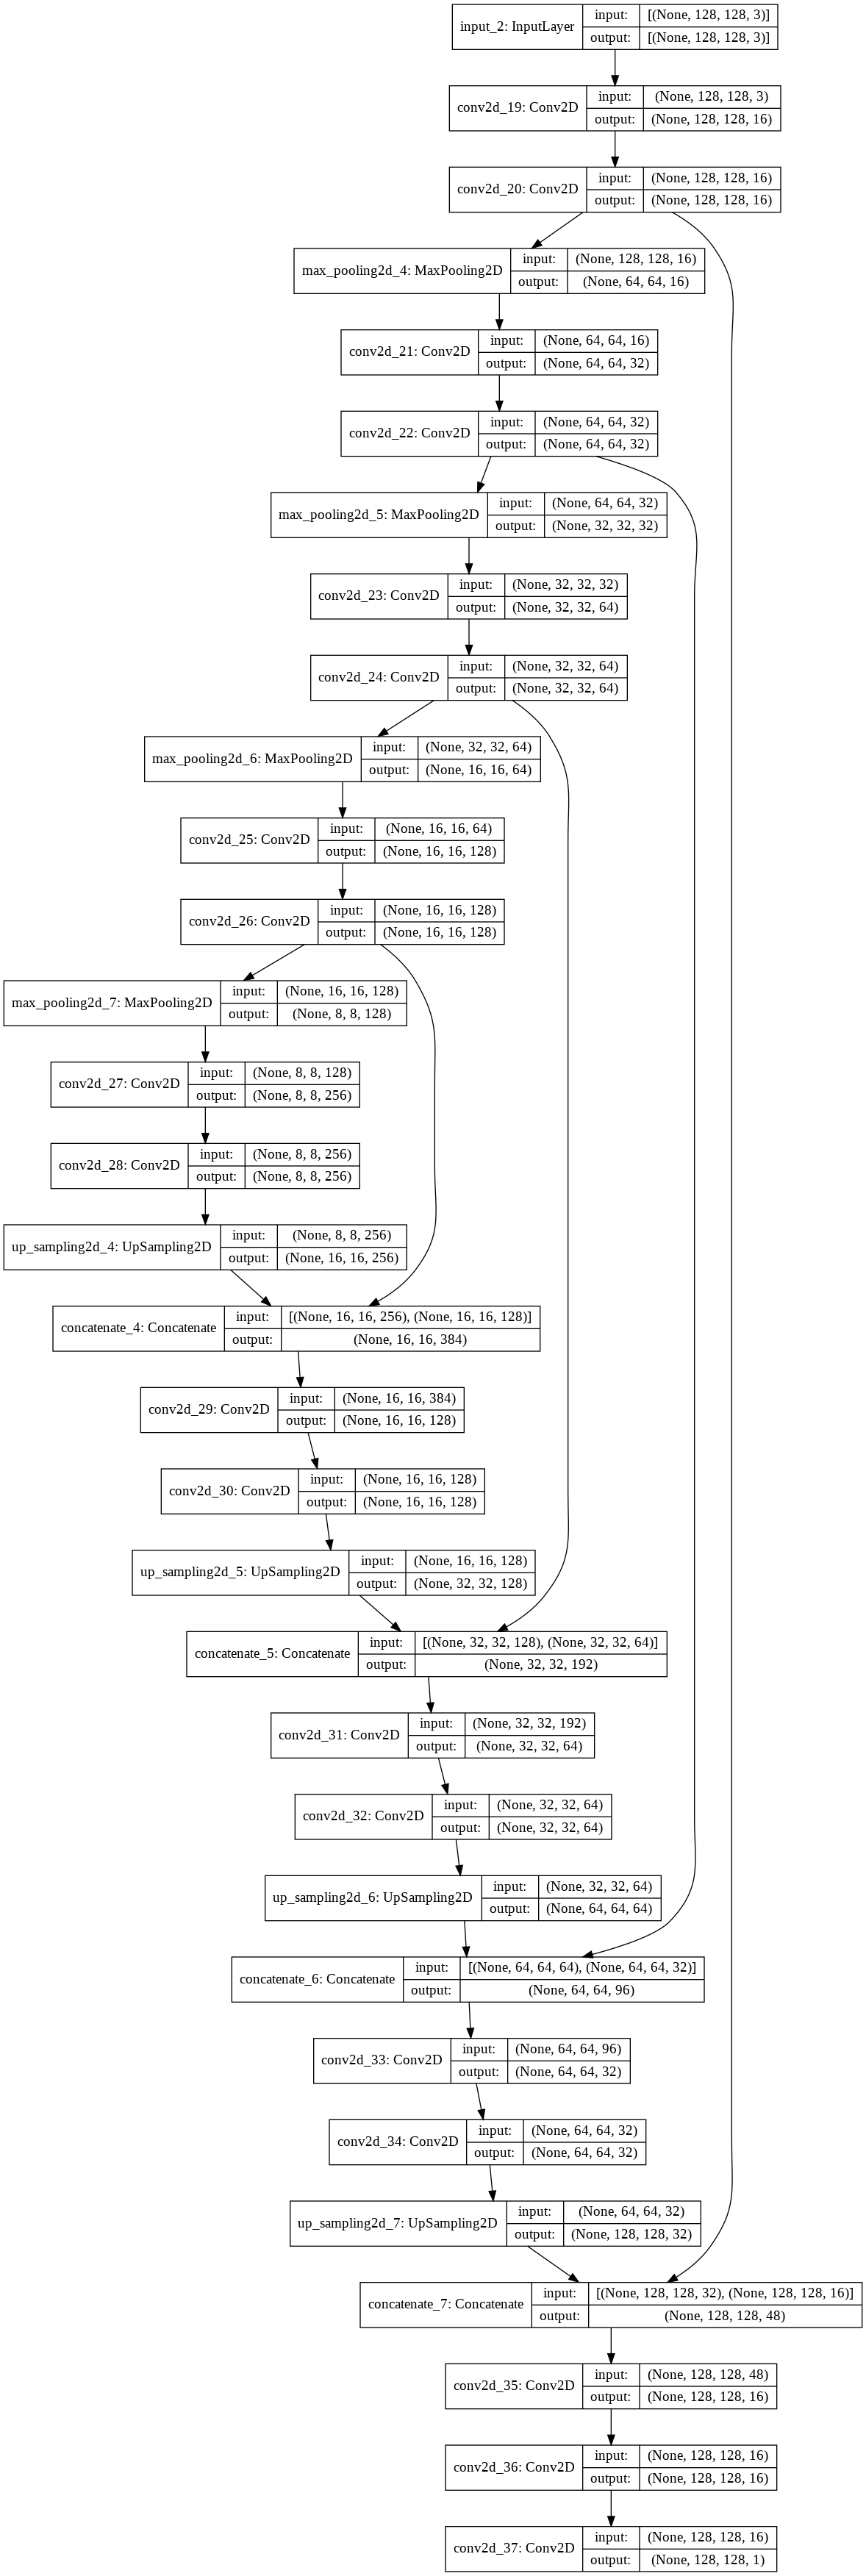

In [51]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Unetmodel_plot.png', show_shapes=True, show_layer_names=True)

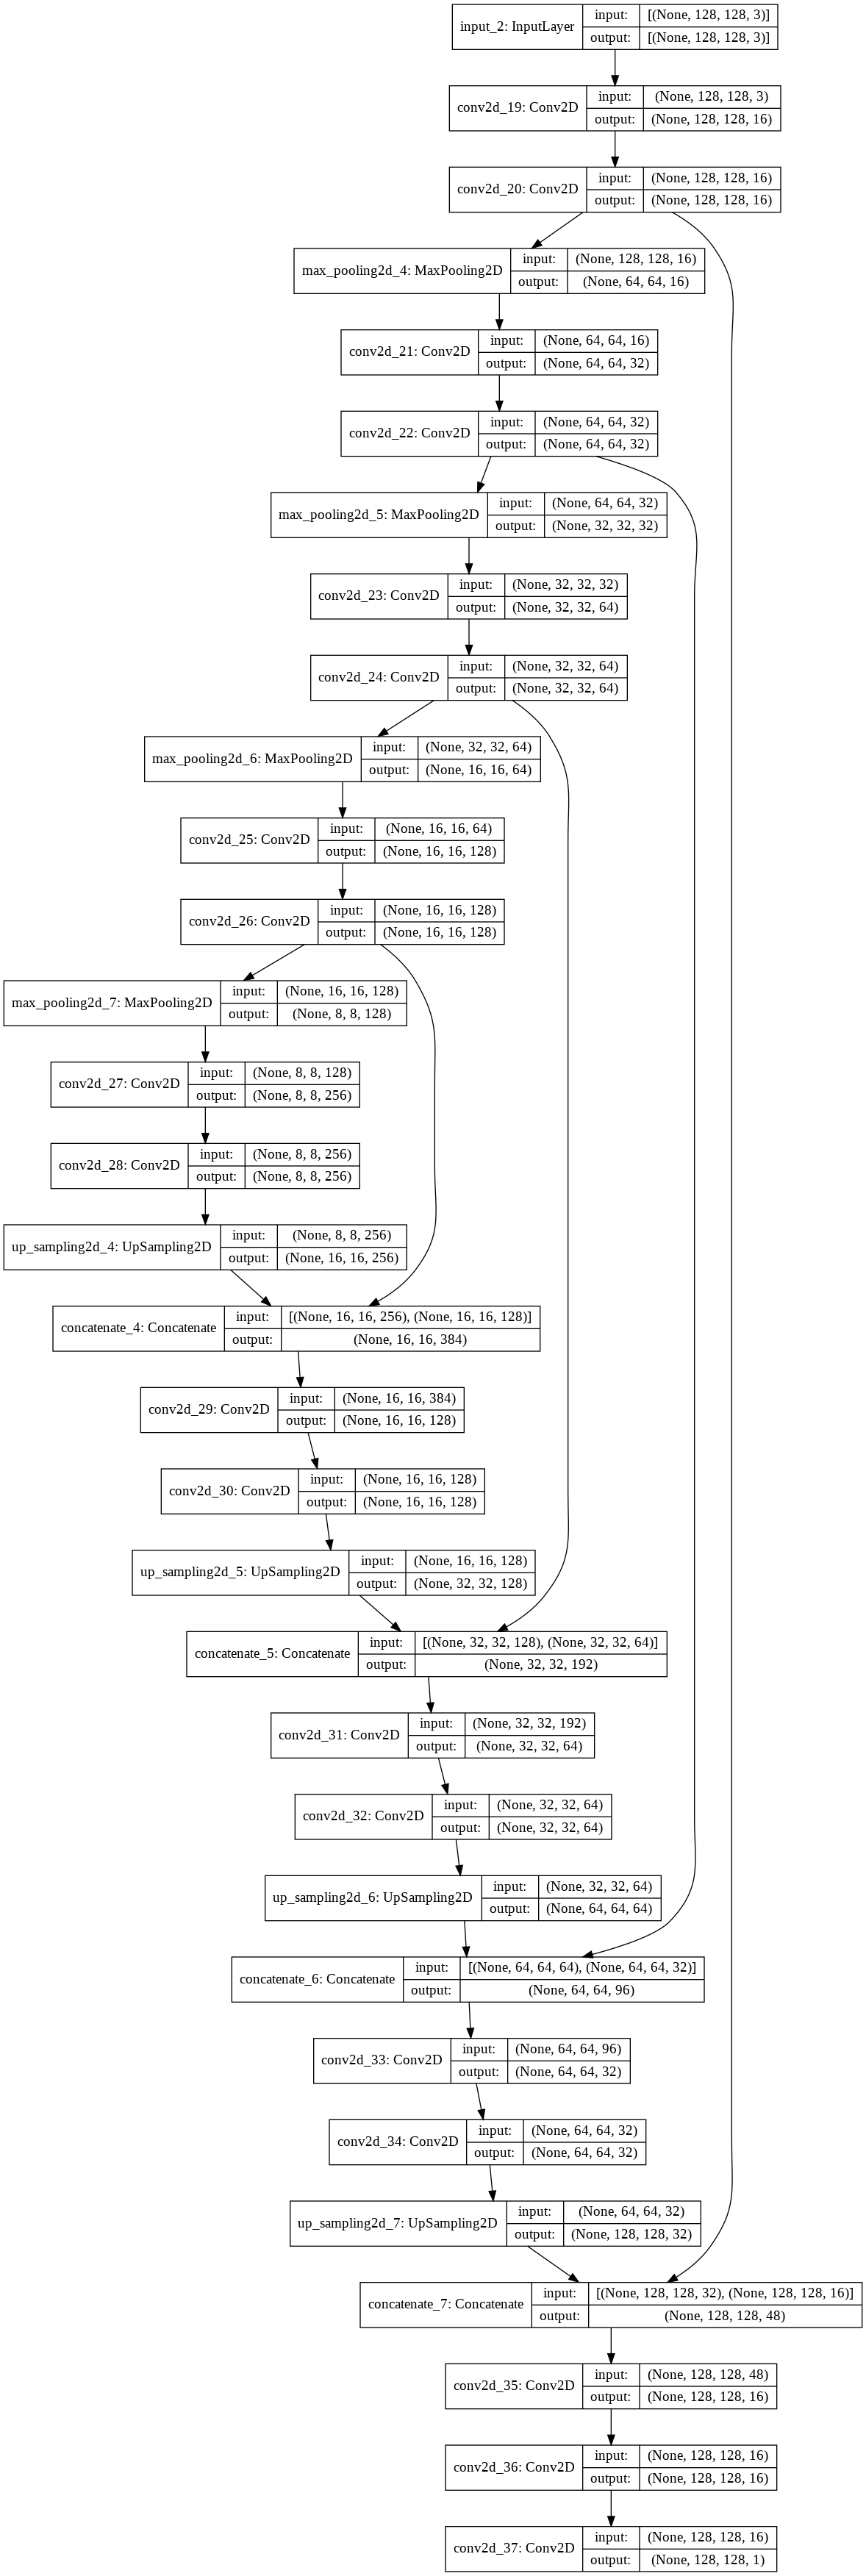

In [52]:
import IPython
IPython.display.Image("Unetmodel_plot.png")

- Training the model

In [60]:
%%time

train_gen = DataGen(train_ids, train_path, image_size=image_size, batch_size=batch_size)
valid_gen = DataGen(valid_ids, train_path, image_size=image_size, batch_size=batch_size)

train_steps = len(train_ids)//batch_size
valid_steps = len(valid_ids)//batch_size

model.fit_generator(train_gen, validation_data=valid_gen, steps_per_epoch=train_steps, validation_steps=valid_steps, 
                    epochs=epochs)

Epoch 1/10
82/82 [==============================] - 115s 1s/step - loss: 0.4950 - acc: 0.8243 - val_loss: 0.4829 - val_acc: 0.8186
Epoch 2/10
82/82 [==============================] - 93s 1s/step - loss: 0.2584 - acc: 0.8648 - val_loss: 0.0813 - val_acc: 0.9572
Epoch 3/10
82/82 [==============================] - 97s 1s/step - loss: 0.2535 - acc: 0.8965 - val_loss: 0.0836 - val_acc: 0.9570
Epoch 4/10
82/82 [==============================] - 94s 1s/step - loss: 0.1281 - acc: 0.9363 - val_loss: 0.0531 - val_acc: 0.9655
Epoch 5/10
82/82 [==============================] - 96s 1s/step - loss: 0.1158 - acc: 0.9400 - val_loss: 0.0475 - val_acc: 0.9676
Epoch 6/10
82/82 [==============================] - 94s 1s/step - loss: 0.1048 - acc: 0.9451 - val_loss: 0.0486 - val_acc: 0.9661
Epoch 7/10
82/82 [==============================] - 99s 1s/step - loss: 0.1080 - acc: 0.9443 - val_loss: 0.0426 - val_acc: 0.9688
Epoch 8/10
82/82 [==============================] - 95s 1s/step - loss: 0.0998 - acc: 0.9

- Listing all data in history

In [61]:
model.history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [62]:
model.history.history['acc']

[0.8243208527565002,
 0.8647920489311218,
 0.8965487480163574,
 0.9362958669662476,
 0.9400389194488525,
 0.9451135993003845,
 0.9442998170852661,
 0.9462883472442627,
 0.9514182209968567,
 0.9463796615600586]

- Training Result Visualization

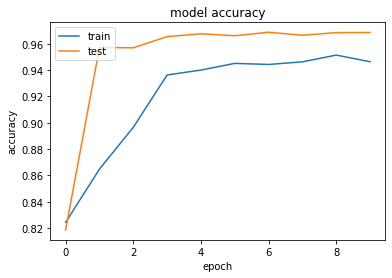

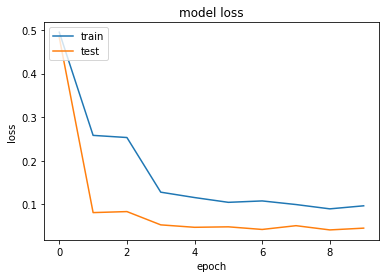

In [63]:
# summarize history for accuracy

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- pip install h5py


- save Model - HDF5 file
    - model.save('my_model.h5') 
    - model = load_model('my_model.h5')

- save Model Weights only
    - model.save_weights('my_model_weights.h5')
    - model.load_weights('my_model_weights.h5')

- Testing the model

In [64]:
# Save the Weights
model.save_weights("/content/drive/My Drive/Coding_Club/Unetweights.h5")

# load model weights
#model.load_weights("/content/drive/My Drive/Coding_Club/Unetweights.h5")

# predict results on test Dataset 
x, y = valid_gen.__getitem__(1)
result = model.predict(x)
print(len(result))

result = result > 0.5
print(len(result))
print(result.shape)

2
2
(2, 128, 128, 1)


- Testing Result Visualization - Gray color 

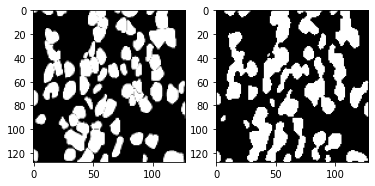

In [65]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[0]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[0]*255, (image_size, image_size)), cmap="gray")

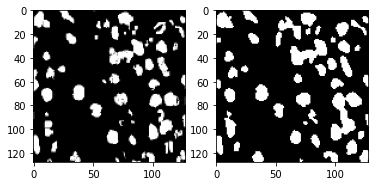

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[1]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[1]*255, (image_size, image_size)), cmap="gray")

- Testing Result Visualization - color 

In [ ]:
# Save the Weights
# model.save_weights("Unetweights.h5")

# predict results on testing Dataset
x, y = valid_gen.__getitem__(3)
result = model.predict(x)

print(len(result))

result = result > 0.5
print(len(result))
print(result.shape)

2
2
(2, 128, 128, 1)


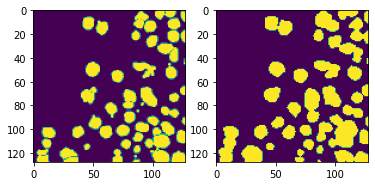

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[0]*255, (image_size, image_size))) 

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[0]*255, (image_size, image_size)))

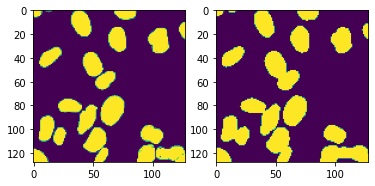

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[1]*255, (image_size, image_size))) 

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[1]*255, (image_size, image_size)))